# Black Friday consumer prediction
In this document a Dataset containing information about age, gender, occupation, marital status, etc, is going to be use to predict the amount of money spent in a black friday by each individual.

## Import libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
%matplotlib inline

## Gettting the data
This data was obtained from Analytics Vidhya from the following url: https://datahack.analyticsvidhya.com/contest/black-friday/

## Load the data

In [16]:
data=pd.read_csv("Data/BlackFriday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data cleaning
### Missing values

First we're going to check if there are any missing values inside the dataset

In [4]:
print(data.isnull().sum(axis=0))
print(data.shape)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64
(537577, 12)


As is possible to see, in the columns Product_Category_2 and Product_Category_3 are missing a lot of values.

In [17]:
perce_1=(data.isnull().sum(axis=0)["Product_Category_2"])*100/(data.shape[0])
perce_2=(data.isnull().sum(axis=0)["Product_Category_3"])*100/(data.shape[0])

print("Percentage of missing values in Product_Category_2: "+str(perce_1),"%""\n","Percentage of missing values in Product_Category_3: "+str(perce_2),"%")

Percentage of missing values in Product_Category_2: 31.06271287648095 %
 Percentage of missing values in Product_Category_3: 69.44102891306734 %


The percentage of missing values is significantly high. And doing research over the dataset, this two categories are sub categories for Product_Category_1, for example: Product_Category_1: Toys --> Product_Category_2: Cars --> Product_Category_3: 0-4 years, so the product is already categorice and due to the amount of missing values is decided to delete this two variables. 

In [18]:
Clean_Data_Set=data.drop(["Product_Category_2","Product_Category_3"],axis=1)

### Categorical variables
In this dataset, all the variables are categorical, so we're going to transform them in Dummy variables, this is because the the model needs numerical variables

In [19]:
Clean_Data_Set=pd.get_dummies(Clean_Data_Set,prefix='Gender',columns =['Gender'],drop_first=True)
Clean_Data_Set=pd.get_dummies(Clean_Data_Set,prefix='City_Category',columns =['City_Category'],drop_first=True)
Clean_Data_Set=pd.get_dummies(Clean_Data_Set,prefix='Occupation',columns =['Occupation'],drop_first=True)
Clean_Data_Set=pd.get_dummies(Clean_Data_Set,prefix='Age',columns =['Age'],drop_first=True)
Clean_Data_Set=pd.get_dummies(Clean_Data_Set,prefix='Product_Category_1',columns =['Product_Category_1'],drop_first=True)
Clean_Data_Set=pd.get_dummies(Clean_Data_Set,prefix='Stay_In_Current_City_Years',columns =['Stay_In_Current_City_Years'],drop_first=True)
Clean_Data_Set.head()

,User_ID,Product_ID,Marital_Status,Purchase,Gender_M,City_Category_B,City_Category_C,Occupation_1,Occupation_2,Occupation_3,...,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,8370,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,0,15200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,0,1422,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,0,1057,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,0,7969,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Data analysis
In this part, we're going to look over the whole dataset looking for any correlation or patron in the differents groups of people that could lead us to a better model implementation.

### Total money spent by different categories

Text(0, 0.5, 'Purchase amount')

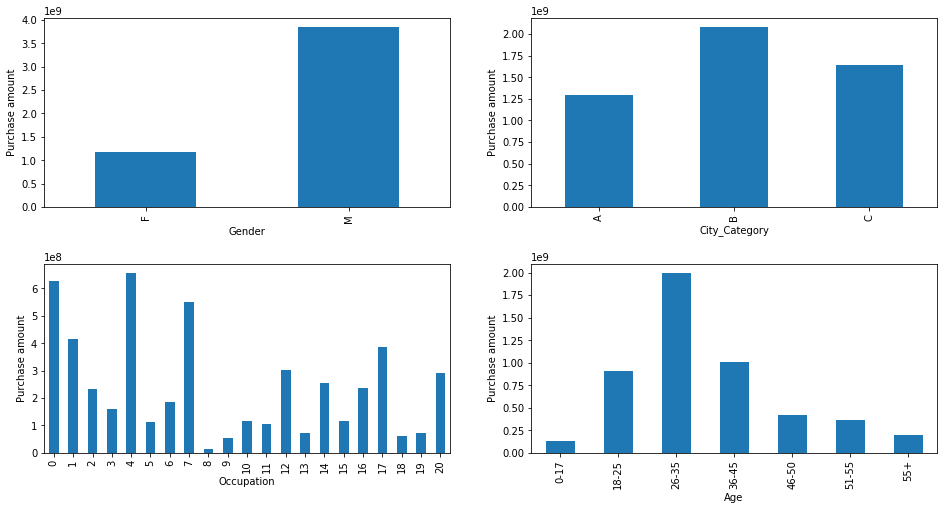

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=[16,8])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
ax1=data.groupby(['Gender']).sum()["Purchase"].plot.bar(ax=ax1)
ax1.set_ylabel("Purchase amount")
ax2=data.groupby(['City_Category']).sum()["Purchase"].plot.bar(ax=ax2)
ax2.set_ylabel("Purchase amount")
ax3=data.groupby(['Occupation']).sum()["Purchase"].plot.bar(ax=ax3)
ax3.set_ylabel("Purchase amount")
ax4=data.groupby(['Age']).sum()["Purchase"].plot.bar(ax=ax4)
ax4.set_ylabel("Purchase amount")



There are tendencies over the different categories, for example the men, people from City_Category_B and people in the age range of 26 to 35 are the ones that spent more.

### Distribution of the people over the different categories

Text(0, 0.5, 'Age')

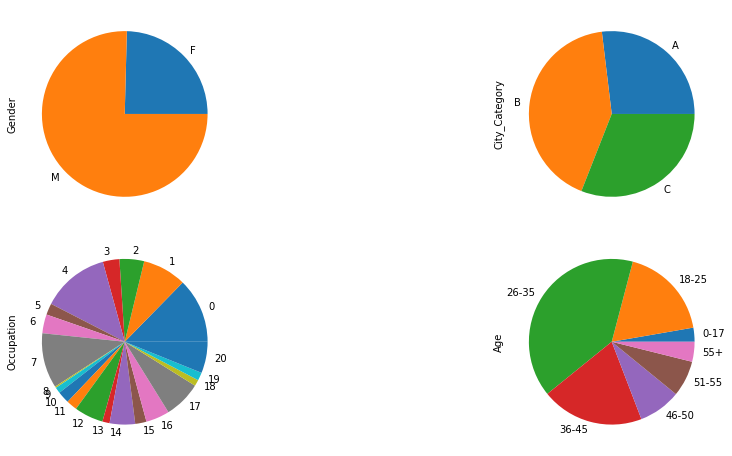

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=[16,8])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
ax1=data.groupby(['Gender']).count()["Purchase"].plot.pie(ax=ax1)
ax1.set_ylabel("Gender")
ax2=data.groupby(['City_Category']).count()["Purchase"].plot.pie(ax=ax2)
ax2.set_ylabel("City_Category")
ax3=data.groupby(['Occupation']).count()["Purchase"].plot.pie(ax=ax3)
ax3.set_ylabel("Occupation")
ax4=data.groupby(['Age']).count()["Purchase"].plot.pie(ax=ax4)
ax4.set_ylabel("Age")


As is possible to see, the men, people from City_Category_B and people in the age range of 26 to 35 are the ones who go shopping more on this day

### Most bought product category

Text(0, 0.5, 'Total purchases')

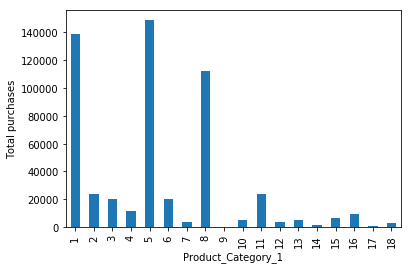

In [22]:
data.groupby(['Product_Category_1']).count()["Purchase"].plot.bar().set_ylabel("Total purchases")


The product category that people buy more was number 5, follow by number 1 and 8

### 10 most bought products

Text(0, 0.5, 'Total purchases')

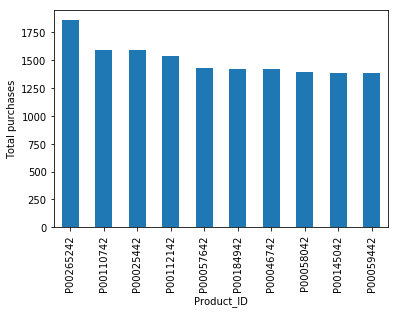

In [23]:
data.groupby(['Product_ID']).count()["Purchase"].sort_values(ascending=False)[:10].plot.bar().set_ylabel("Total purchases")


# Machine Learning Algorithms
We're going to use two algorithms for the model prediction:
- Linear Regression
- Random Forest

## Linear Regression

In [24]:
column_names=Clean_Data_Set.columns.values.tolist()
not_use=["User_ID","Product_ID","Purchase"]
Y=["Purchase"]
X=[i for i in column_names if i not in not_use]

# Split the data set into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(Clean_Data_Set[X],Clean_Data_Set[Y],test_size=0.3,random_state=0)


# Use PCA to reduce dimesion of the problem
pca=PCA(0.95) # Set the model to retain 95% of the variance
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# Linear Model implementation
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# Evalation of the model with R^2
model.score(X_test,Y_test)

0.35838797320293336

When evaluating the model with R^2, is important to know that R^2 varies between 0 to 1 and the higher the better. For this model we get a value of 0.358. 

## Random Forest

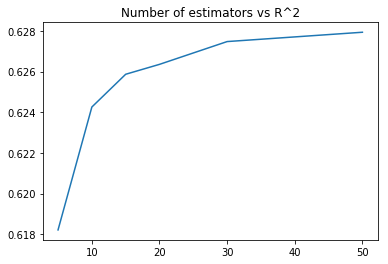

In [26]:
Pred=[]
i=0
#vec=np.linspace(10,200,20)

vec=[5,10,15,20,30,50]
for n_estimators in vec:  # Loop para encontrar el número óptimo de árboles en el forest
    i+=1
    RF=RandomForestRegressor(n_estimators=int(n_estimators),random_state=0) 
    type
    RF.fit(X_train,Y_train.values.ravel())

        # Predicciones con Random forest

        #predicciones=RF.predict(X_test)
        # Exactitud del modelo
    Exac=RF.score(X_test,Y_test.values.ravel())
    Pred.append(Exac)

plt.plot(vec,Pred)
plt.title("Number of estimators vs R^2")
plt.show()

In the above graph is possible to see the value of R^2 for different numbers of estimators, where the R^2 value tends to stabilize at 30. That's why we choose 30 estimators for this model

In [27]:
print("R^2 for 30 estimators:",Pred[4])

R^2 for 30 estimators: 0.6274786689999416


# Conclusions
- Random forest turns out to be the best choice with a R^2 value of 0.6274 over the 0.358 in Linear regression. One of the many reasons for this, is that Random forest is a more robust algorithm and handle better the categorical variables
- There are tendencies over the dataset that could be used for marketing purpose like: the 10 most bought products, the range of age that buy more and so many others that help us understand the behavior of people in this date.